# Download Raw Data
- whole
- mask
- part

In [5]:
from google.cloud import storage
import os

def download_folder(bucket_name, source_folder_name, destination_folder_name):

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blobs = bucket.list_blobs(prefix=source_folder_name)

    for blob in blobs:
        # Remove the folder prefix from the blob name to get the relative path
        relative_path = os.path.relpath(blob.name, source_folder_name)
        destination_path = os.path.join(destination_folder_name, relative_path)

        # Ensure the destination directory exists
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        
        # Download the file
        try:
            blob.download_to_filename(destination_path)
            print(f"Downloaded {blob.name} to {destination_path}")
        except:
            print(f"failed {blob.name} to {destination_path}")

# Usage example:
bucket_name = "leo_font"
source_folder_name = "exp0820/raw/플레이브밤비2/parts"
destination_folder_name = "/home/jupyter/ai_font/data/exp0820/raw/플레이브밤비2/parts"

download_folder(bucket_name, source_folder_name, destination_folder_name)


failed exp0820/raw/플레이브밤비2/parts/ to /home/jupyter/ai_font/data/exp0820/raw/플레이브밤비2/parts/.
Downloaded exp0820/raw/플레이브밤비2/parts/ㄱ.png to /home/jupyter/ai_font/data/exp0820/raw/플레이브밤비2/parts/ㄱ.png
Downloaded exp0820/raw/플레이브밤비2/parts/ㄱㄱ.png to /home/jupyter/ai_font/data/exp0820/raw/플레이브밤비2/parts/ㄱㄱ.png
Downloaded exp0820/raw/플레이브밤비2/parts/ㄱㅅ.png to /home/jupyter/ai_font/data/exp0820/raw/플레이브밤비2/parts/ㄱㅅ.png
Downloaded exp0820/raw/플레이브밤비2/parts/ㄴ.png to /home/jupyter/ai_font/data/exp0820/raw/플레이브밤비2/parts/ㄴ.png
Downloaded exp0820/raw/플레이브밤비2/parts/ㄴㅈ.png to /home/jupyter/ai_font/data/exp0820/raw/플레이브밤비2/parts/ㄴㅈ.png
Downloaded exp0820/raw/플레이브밤비2/parts/ㄴㅎ.png to /home/jupyter/ai_font/data/exp0820/raw/플레이브밤비2/parts/ㄴㅎ.png
Downloaded exp0820/raw/플레이브밤비2/parts/ㄷ.png to /home/jupyter/ai_font/data/exp0820/raw/플레이브밤비2/parts/ㄷ.png
Downloaded exp0820/raw/플레이브밤비2/parts/ㄷㄷ.png to /home/jupyter/ai_font/data/exp0820/raw/플레이브밤비2/parts/ㄷㄷ.png
Downloaded exp0820/raw/플레이브밤비2/parts/ㄹ.png to /home/jupyte

# Closing Process

In [42]:
# normalize the name
# move the whole file
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import unicodedata
import cv2

def char_normalize(f):
    return unicodedata.normalize('NFC', f)

def augmenting(img):
    img = np.array(img)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))

    blurred = cv2.GaussianBlur(img, (3, 3), 0)
    processed = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel)
    closing = Image.fromarray(processed)
    # err = cv2.erode(processed, kernel)
    # erode = Image.fromarray(err)
    # dil = cv2.dilate(processed, kernel)
    # dilate = Image.fromarray(dil)
    return {
        "closing": closing,
        # "erode": erode,
        # "dilate":dilate,
    }

In [43]:
fd = "/home/jupyter/ai_font/data/exp0820"

In [44]:
tfd = f"{fd}/processed/train_whole/플레이브밤비"
os.makedirs(tfd, exist_ok=True)

In [14]:
ffd = f"{fd}/raw/플레이브밤비2/inpainting_mask"
for f in os.listdir(ffd):
    if ("_m" not in f) & ("복사본" not in f) & f.endswith(".png"):
        img = Image.open(f"{ffd}/{f}")
        aug = augmenting(img)
        savefn = f"{tfd}/플레이브밤비__closing__{char_normalize(f)}"
        aug['closing'].save(savefn)

/home/jupyter/ai_font/data/exp0820/processed/train_whole/플레이브밤비/플레이브밤비__closing__탤.png
/home/jupyter/ai_font/data/exp0820/processed/train_whole/플레이브밤비/플레이브밤비__closing__츄.png
/home/jupyter/ai_font/data/exp0820/processed/train_whole/플레이브밤비/플레이브밤비__closing__뤄.png
/home/jupyter/ai_font/data/exp0820/processed/train_whole/플레이브밤비/플레이브밤비__closing__줬.png
/home/jupyter/ai_font/data/exp0820/processed/train_whole/플레이브밤비/플레이브밤비__closing__찧.png
/home/jupyter/ai_font/data/exp0820/processed/train_whole/플레이브밤비/플레이브밤비__closing__몇.png
/home/jupyter/ai_font/data/exp0820/processed/train_whole/플레이브밤비/플레이브밤비__closing__푀.png
/home/jupyter/ai_font/data/exp0820/processed/train_whole/플레이브밤비/플레이브밤비__closing__특 복사본 3.png
/home/jupyter/ai_font/data/exp0820/processed/train_whole/플레이브밤비/플레이브밤비__closing__뷔.png
/home/jupyter/ai_font/data/exp0820/processed/train_whole/플레이브밤비/플레이브밤비__closing__팼 복사본 2.png
/home/jupyter/ai_font/data/exp0820/processed/train_whole/플레이브밤비/플레이브밤비__closing__퍗 복사본 3.png
/home/jupyter/ai_font/dat

In [45]:
ffd = f"{fd}/raw/플레이브밤비2/parts"
tfd = f"{fd}/processed/train_parts/플레이브밤비"
os.makedirs(tfd, exist_ok=True)
for f in os.listdir(ffd):
    if f.endswith(".png"):
        img = Image.open(f"{ffd}/{f}")
        aug = augmenting(img)
        savefn = f"{tfd}/플레이브밤비__closing__{char_normalize(f)}"
        aug['closing'].save(savefn)

In [8]:
os.listdir(fd)

['.ipynb_checkpoints', 'parts', 'inpainting_mask']

In [34]:
import shutil

ffd = f"{fd}/raw/플레이브밤비2/inpainting_mask"
tfd = f"{fd}/processed/train_masks/플레이브밤비"
os.makedirs(tfd, exist_ok=True)
for f in os.listdir(ffd):
    if "_m" in f:
        savefn = f"{tfd}/플레이브밤비__{char_normalize(f)}"
        shutil.copy(f"{ffd}/{f}", savefn)

In [38]:
shutil.copy(f"{ffd}/{f}", savefn)

'/home/jupyter/ai_font/data/exp0820/processed/train_masks/플레이브밤비/플레이브밤비__땍_m2.png'

# Copy Training Data From June Data

In [19]:
import shutil

fd = "/home/jupyter/ai_font/data"
tfd = tfd = f"{fd}/exp0820/processed/train_whole"
pbar = tqdm(os.listdir(f"{fd}/train"))
for font in pbar:
    os.makedirs(f"{tfd}/{font}", exist_ok=True)
    for f in os.listdir(f"{fd}/train/{font}"):
        if "closing" in f:
            shutil.copy(f"{fd}/train/{font}/{f}", f"{tfd}/{font}/{f}")
    pbar.set_postfix(font=font)

100%|██████████| 420/420 [19:12<00:00,  2.74s/it, font=어비미완체볼드]    ]             


In [20]:
import shutil

fd = "/home/jupyter/ai_font/data"
tfd = f"{fd}/exp0820/processed/train_parts"
pbar = tqdm(os.listdir(f"{fd}/train_parts"))
for font in pbar:
    os.makedirs(f"{tfd}/{font}", exist_ok=True)
    for f in os.listdir(f"{fd}/train_parts/{font}"):
        if "closing" in f:
            shutil.copy(f"{fd}/train_parts/{font}/{f}", f"{tfd}/{font}/{f}")
    pbar.set_postfix(font=font)

100%|██████████| 422/422 [00:09<00:00, 43.55it/s, font=어비미완체볼드]    ]             


# Make Assemble Style 

In [46]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image


def get_all_korean():

    def nextKorLetterFrom(letter):
        lastLetterInt = 15572643
        if not letter:
            return '가'
        a = letter
        b = a.encode('utf8')
        c = int(b.hex(), 16)

        if c == lastLetterInt:
            return False

        d = hex(c + 1)
        e = bytearray.fromhex(d[2:])

        flag = True
        while flag:
            try:
                r = e.decode('utf-8')
                flag = False
            except UnicodeDecodeError:
                c = c+1
                d = hex(c)
                e = bytearray.fromhex(d[2:])
        return e.decode()

    returns = []
    flag = True
    k = ''
    while flag:
        k = nextKorLetterFrom(k)
        if k is False:
            flag = False
        else:
            returns.append(k)
    return returns

def merge_img(img0, img1, img2):
    mmg = Image.new("L", (128*2, 128*2), 255)
    mmg.paste(img0, (0,0))
    mmg.paste(img1, (128,0))
    if img2 is not None:
        mmg.paste(img2, (64,128))
    return mmg.resize((96,96), Image.BILINEAR)

def get_imgs(fd, font, tag, letter):
    
    ch1_list = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    ch2_list = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    ch3_list = [None, 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

    
    ch1 = (ord(letter) - ord('가'))//588
    ch2 = ((ord(letter) - ord('가')) - (588*ch1)) // 28
    ch3 = (ord(letter) - ord('가')) - (588*ch1) - 28*ch2

    return (
        Image.open(f"{fd}/{font}/{font}__{tag}__{ch1_list[ch1]}.png"),
        Image.open(f"{fd}/{font}/{font}__{tag}__{ch2_list[ch2]}.png"),
        None if ch3_list[ch3] is None else Image.open(f"{fd}/{font}/{font}__{tag}__{ch3_list[ch3]}.png"),
    )

In [47]:
fd = "/home/jupyter/ai_font/data"
partfd = f"{fd}/exp0820/processed/train_parts"
assemblefd = f"{fd}/exp0820/processed/train_assembled"
ak = get_all_korean()

In [23]:
for font in tqdm(os.listdir(partfd)):
    os.makedirs(f"{assemblefd}/{font}", exist_ok=True)
    for tag in ['closing']:
        for letter in ak:
            try:
                img0, img1, img2 = get_imgs(partfd, font, tag, letter)
                img = merge_img(img0,img1,img2)
                img.save(f"{assemblefd}/{font}/{font}__{tag}__{letter}.png")
            except:
                pass

100%|██████████| 423/423 [1:38:39<00:00, 13.99s/it]


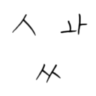

In [28]:
fd = "/home/jupyter/ai_font/data"
partfd = f"{fd}/exp0820/processed/train_parts"
assemblefd = f"{fd}/exp0820/processed/train_assembled"
Image.open(f"{assemblefd}/플레이브밤비/플레이브밤비__closing__솼.png")

In [49]:
def get_imgs(fd, font, tag, letter):
    
    ch1_list = ['ㄱ', 'ㄱㄱ', 'ㄴ', 'ㄷ', 'ㄷㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅂㅂ', 'ㅅ', 'ㅅㅅ', 'ㅇ', 'ㅈ', 'ㅈㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    ch2_list = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    ch3_list = [None, 'ㄱ', 'ㄱㄱ', 'ㄱㅅ', 'ㄴ', 'ㄴㅈ', 'ㄴㅎ', 'ㄷ', 'ㄹ', 'ㄹㄱ', 'ㄹㅁ', 'ㄹㅂ', 'ㄹㅅ', 'ㄹㅌ', 'ㄹㅍ', 'ㄹㅎ', 'ㅁ', 'ㅂ', 'ㅂㅅ', 'ㅅ', 'ㅅㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

    
    ch1 = (ord(letter) - ord('가'))//588
    ch2 = ((ord(letter) - ord('가')) - (588*ch1)) // 28
    ch3 = (ord(letter) - ord('가')) - (588*ch1) - 28*ch2

    return (
        Image.open(f"{fd}/{font}/{font}__{tag}__{ch1_list[ch1]}.png"),
        Image.open(f"{fd}/{font}/{font}__{tag}__{ch2_list[ch2]}.png"),
        None if ch3_list[ch3] is None else Image.open(f"{fd}/{font}/{font}__{tag}__{ch3_list[ch3]}.png"),
    )

font = "플레이브밤비"
for tag in ['closing']:
    for letter in ak:
        try:
            img0, img1, img2 = get_imgs(partfd, font, tag, letter)
            img = merge_img(img0,img1,img2)
            img.save(f"{assemblefd}/{font}/{font}__{tag}__{letter}.png")
        except:
            pass

In [1]:
import random

In [6]:
random.random()

0.7758264780589532